Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

Importing the datasets

In [2]:
df=pd.read_csv('/content/books.csv')

In [3]:
df_1=pd.read_csv('/content/book_tags.csv')

In [4]:
df_2=pd.read_csv('/content/ratings.csv')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    399 non-null    int64  
 1   goodreads_book_id          399 non-null    int64  
 2   best_book_id               399 non-null    int64  
 3   work_id                    399 non-null    int64  
 4   books_count                399 non-null    int64  
 5   isbn                       388 non-null    object 
 6   isbn13                     389 non-null    float64
 7   authors                    399 non-null    object 
 8   original_publication_year  399 non-null    float64
 9   original_title             363 non-null    object 
 10  title                      399 non-null    object 
 11  language_code              356 non-null    object 
 12  average_rating             399 non-null    float64
 13  ratings_count              399 non-null    int64  

In [16]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40200 entries, 0 to 40199
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   goodreads_book_id  40200 non-null  int64
 1   tag_id             40200 non-null  int64
 2   count              40200 non-null  int64
dtypes: int64(3)
memory usage: 942.3 KB


In [17]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233383 entries, 0 to 233382
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  233383 non-null  int64
 1   book_id  233383 non-null  int64
 2   rating   233383 non-null  int64
dtypes: int64(3)
memory usage: 5.3 MB


1.How many books do not have an original title [books.csv]?

In [6]:
no_of_books_without_an_original_title=df['original_title'].isnull().sum()
print("Number of books without an original title is:",no_of_books_without_an_original_title)

Number of books without an original title is: 36


2.How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing records containing null values for original_title column in [books.csv] and corresponding records in [book_tags.csv] and [ratings.csv]

In [11]:
df_cleaned = df.dropna(subset=['original_title'])


In [12]:
df_1_cleaned = df_1[df_1['goodreads_book_id'].isin(df_cleaned['book_id'])]
df_2_cleaned = df_2[df_2['book_id'].isin(df_cleaned['book_id'])]

In [24]:
unique_books_count = df_cleaned['book_id'].nunique()
print("Number of unique books present in the dataset after cleaning is :", unique_books_count)

Number of unique books present in the dataset after cleaning is : 363


3.How many unique users are present in the dataset [ratings.csv] ?

In [26]:
unique_user_count = df_2['user_id'].nunique()
print("Number of unique users in the 'ratings.csv' dataset is:", unique_user_count)

Number of unique users in the 'ratings.csv' dataset is: 40836


4.How many unique tags are there in the dataset [book_tags.csv] ?

In [27]:
unique_tags_count=df_1['tag_id'].nunique()
print("Number of unique tags in the 'book_tags' dataset is:", unique_tags_count)

Number of unique tags in the 'book_tags' dataset is: 3651


5.Which tag_id is the most frequently used ie. mapped with the highest number of books [book_tags.csv] ? (In case of more than one tag, mention the tag id with the least numerical value)’.

In [28]:
frequent_used_tag_id = df_1['tag_id'].value_counts().idxmax()
print("Tag_id most frequently used is:", frequent_used_tag_id)

Tag_id most frequently used is: 4600


6.Which book (title) has the most number of counts of tags given by the user [book_tags.csv,books.csv]

In [29]:
combined_df = pd.merge(df_1, df, left_on='goodreads_book_id', right_on='book_id')
most_tagged_book = combined_df.groupby('title')['count'].sum().idxmax()
print("Book with the most number of counts of tags is:", most_tagged_book)

Book with the most number of counts of tags is: Beyond Band of Brothers: The War Memoirs of Major Dick Winters


7.Plot a bar chart with top 20 unique tags in descending order of ‘user records’ (the number of users tagged the given tag_id with the goodreads_book_id) [book_tags.csv]

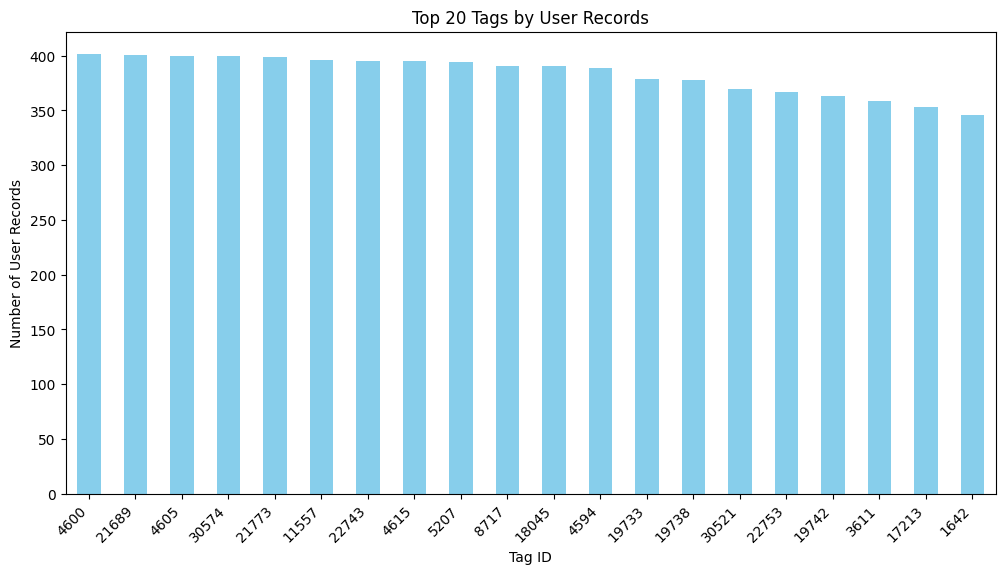

In [23]:
tag_counts = df_1.groupby('tag_id')['goodreads_book_id'].nunique()
top_tags = tag_counts.sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 6))
top_tags.plot(kind='bar', color='skyblue')
plt.xlabel('Tag ID')
plt.ylabel('Number of User Records')
plt.title('Top 20 Tags by User Records')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()